In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# opcional para sacar el accuracy en clasificacion
from sklearn.metrics import accuracy_score

# metricas
from sklearn.metrics import classification_report

In [10]:
df=pd.read_csv("wisc_bc_data.csv", sep=',', decimal='.')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df2=df.drop(['id'], axis=1)
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df2.describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981000,9.529200,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,13.088000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,60.496000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,275.780000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.075042,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.040660,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.004983,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.005621,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.141500,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.053926,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [65]:
df_dummy = pd.get_dummies(df2.diagnosis, drop_first=True)
df_dummy[:5]

,M
0,1
1,1
2,1
3,1
4,1


In [19]:
corr_matrix=df2.corr()

In [20]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

<ipython-input-20-8e01378157da>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


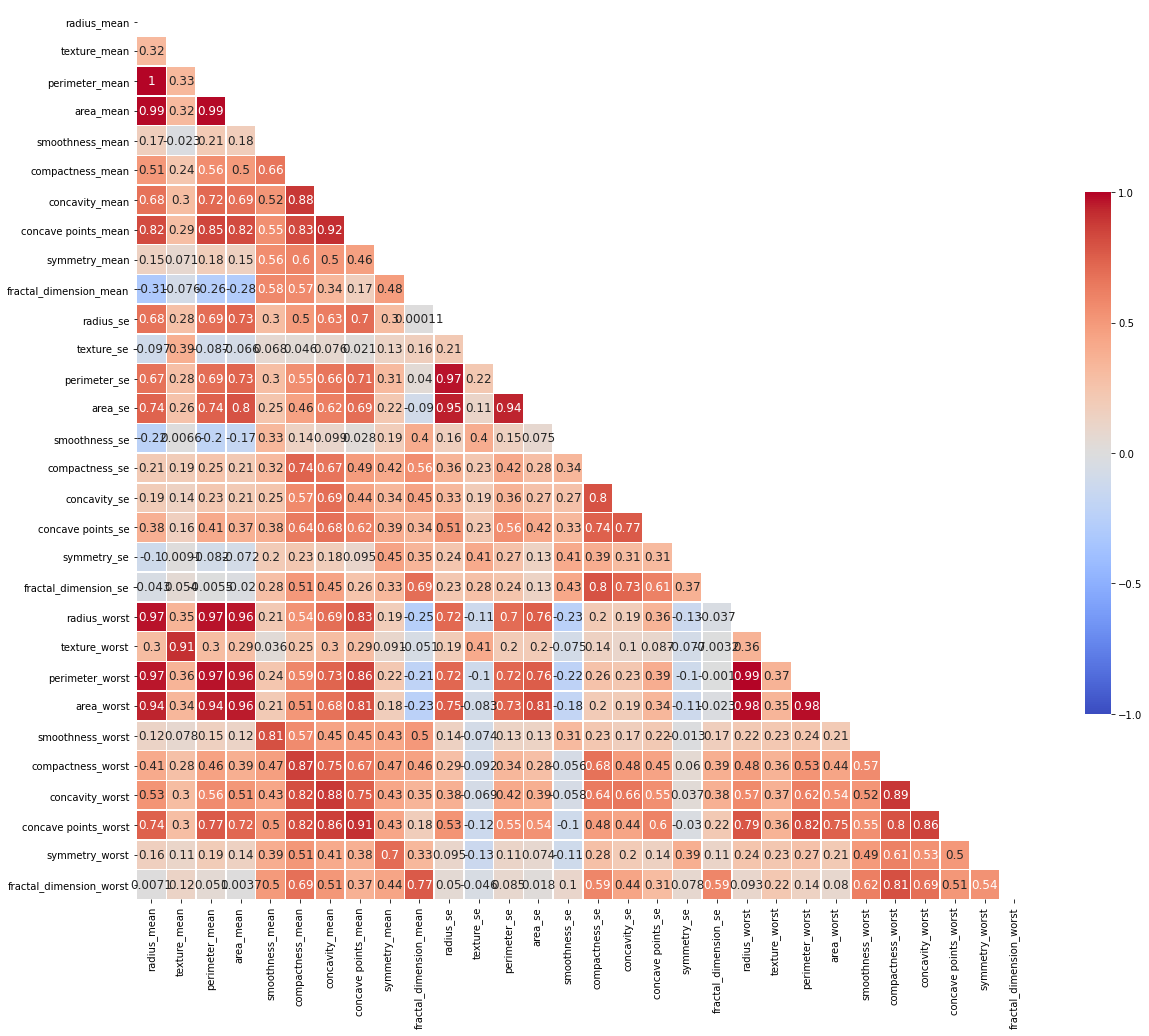

In [21]:
f, ax = plt.subplots(figsize=(20, 24)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

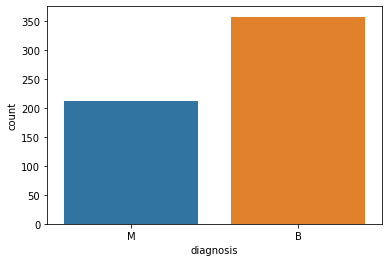

In [22]:
sns.countplot(data=df2, x='diagnosis')

In [23]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [67]:
df_dummy.value_counts()

M
0    357
1    212
dtype: int64

In [83]:
target=df_dummy.to_numpy()

In [84]:
features=df2.loc[:,df2.columns!='diagnosis']
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [85]:
# antes de cualquier preprocesamiento divisimos los datos de entrenamiento y test.
X_train, X_test, y_train, y_test= train_test_split(
                            features,
                            target,
                            test_size=0.2,
                            shuffle=True,
                            random_state=0           
)

In [86]:
print(f'longitud de X_train: {len(X_train)}')
print(f'longitud de y_train: {len(y_train)}')
print(f'longitud de X_test: {len(X_test)}')
print(f'longitud de y_test: {len(y_test)}')

longitud de X_train: 455
longitud de y_train: 455
longitud de X_test: 114
longitud de y_test: 114


In [101]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=uint8), array([67, 47], dtype=int64))

In [88]:
clasifier=LogisticRegression(random_state=0, class_weight='balanced', max_iter=10000)
model=clasifier.fit(X_train,y_train)

C:\Users\jeflores\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [94]:
model.coef_

array([[-7.44870652e-01, -1.81452724e-01,  2.07995301e-01,
        -2.39713844e-02,  1.66523472e-01,  1.70973158e-01,
         3.85707351e-01,  2.59125657e-01,  2.99530048e-01,
         2.53138483e-02,  4.95161526e-02, -1.04573901e+00,
         1.04153284e-03,  1.14552461e-01,  1.44708785e-02,
        -9.79716738e-02, -2.01379167e-02,  2.96336414e-02,
         2.30394440e-02, -2.23061274e-02, -3.87983610e-01,
         4.27321896e-01,  1.99100712e-01,  1.26102724e-02,
         2.90869604e-01,  5.77113000e-01,  1.24800352e+00,
         5.54480527e-01,  6.27615370e-01,  8.24982562e-02]])

In [95]:
model.intercept_

array([-29.43180956])

In [96]:
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=uint8)

In [97]:
np.unique(y_predict, return_counts=True)

(array([0, 1], dtype=uint8), array([63, 51], dtype=int64))

In [98]:
y_predict_proba=model.predict_proba(X_test)
y_predict_proba[:20]

array([[2.98111980e-03, 9.97018880e-01],
       [9.46399719e-01, 5.36002805e-02],
       [9.98124065e-01, 1.87593527e-03],
       [7.92285669e-01, 2.07714331e-01],
       [9.99955766e-01, 4.42342529e-05],
       [9.99057340e-01, 9.42660310e-04],
       [9.95752640e-01, 4.24735953e-03],
       [9.99241478e-01, 7.58521767e-04],
       [9.99859539e-01, 1.40461357e-04],
       [9.99980582e-01, 1.94175673e-05],
       [2.04849794e-01, 7.95150206e-01],
       [6.91409227e-01, 3.08590773e-01],
       [9.99883509e-01, 1.16491194e-04],
       [1.51912927e-01, 8.48087073e-01],
       [5.74647046e-01, 4.25352954e-01],
       [5.07934853e-03, 9.94920651e-01],
       [9.99362415e-01, 6.37585472e-04],
       [4.20903594e-08, 9.99999958e-01],
       [1.59438104e-03, 9.98405619e-01],
       [6.80484558e-11, 1.00000000e+00]])

In [106]:
contar=y_predict_proba>0.5
df_valores=pd.DataFrame(contar)
df_valores[:5]

,0,1
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


In [108]:
df_valores[0].value_counts()

True     63
False    51
Name: 0, dtype: int64

In [109]:
df_valores[1].value_counts()

False    63
True     51
Name: 1, dtype: int64

Text(33.0, 0.5, 'Observado')

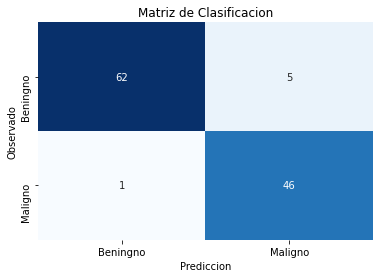

In [100]:
matrix=confusion_matrix(y_test, y_predict)
matrix
class_names=['Beningno','Maligno']
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de Clasificacion")
plt.xlabel("Prediccion")
plt.ylabel("Observado")

In [110]:
accuracy_sklearn=accuracy_score(y_test,y_predict)
print(f"Acucuracy of model with sklearn: {accuracy_sklearn}")

Acucuracy of model with sklearn: 0.9473684210526315


In [112]:
print(classification_report(y_test, y_predict, target_names=class_names))

              precision    recall  f1-score   support

    Beningno       0.98      0.93      0.95        67
     Maligno       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



## conclusion

de 47 enfermos que fueron pasados al modelo, fueron detectados correctamente 46: Recall TP/(TP+FN) es decir el 98%.
con respecto a la precision se puede decir que de lo qeu el modelo predijo como maligno se detectaron correctamente 46,
es decir 0.90.